In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
depth=np.load("depth.mat.npy")
video=np.load("video.mat.npy")

## 2. Wyświetl te obrazy na swoim komputerze przy pomocy biblioteki matplotlib

In [3]:
depth.shape

(480, 640)

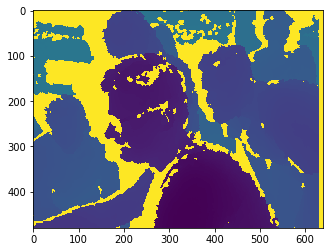

In [4]:
plt.imshow(depth)

In [5]:
video.shape

(480, 640, 3)

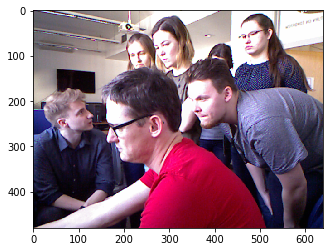

In [6]:
plt.imshow(video)

## 1. Przekształć obraz RGB do skali szarości poprzez uśrednienie składowych.

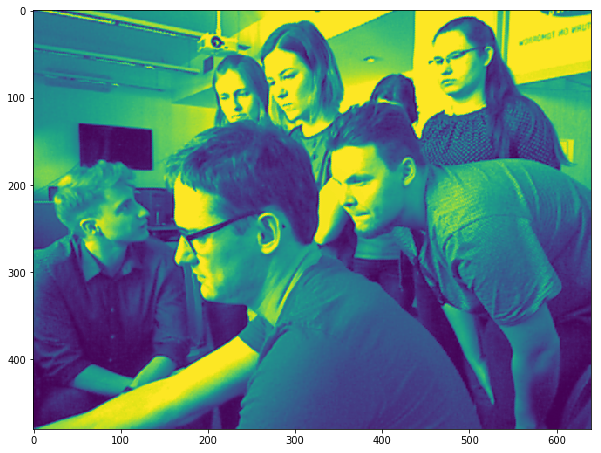

In [7]:
mean_comp_obraz = video.mean(axis=2)
plt.figure(figsize=(10,10))
plt.imshow(mean_comp_obraz)

## 3. Wyświetl histogram obrazu i dokonaj jego “wyrównania” pisząc program w  języku python,  gdzie nowa wartość pixeli o jasności x wynosi n(x) = (x-min)/(max-min)*255 dla parametrów min i max będących maksymalną i minimalną jasnością punktu. To zadanie lepiej wykonywać na pliku o zaburzonym histogramie, np. tym prześwietlonym plikuobrazek.png

In [8]:
from PIL import Image 
im=Image.open("obrazek.png")
obraz=np.array(im.getdata())
im.size

(500, 375)

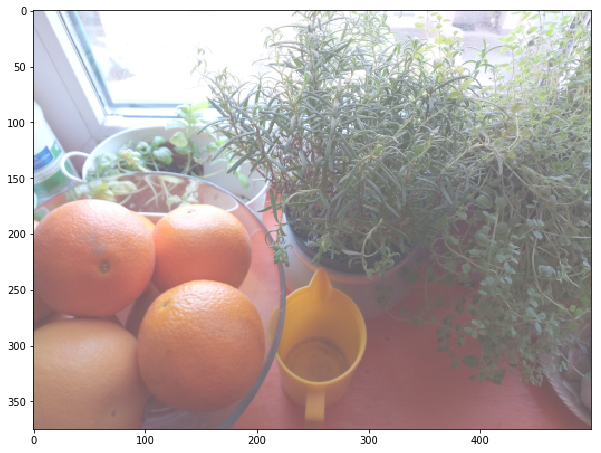

In [9]:
obraz = obraz.reshape(375, 500, 3)
plt.figure(figsize=(10,10))
plt.imshow(obraz)

In [ ]:
plt.hist(obraz.flatten(), bins=255);

In [ ]:
plt.hist(obraz[:,:,0].flatten(), bins=256);

In [ ]:
plt.hist(obraz[:,:,1].flatten(), bins=256);

In [ ]:
plt.hist(obraz[:,:,2].flatten(), bins=256);

In [ ]:
nx0 = (obraz[:,:,0] - obraz[:,:,0].min()) / (obraz[:,:,0].max() - obraz[:,:,0].min()) * 255.
plt.figure(figsize=(10,10))
plt.imshow(nx0)

In [ ]:
plt.hist(nx0.flatten(), bins=256);

In [ ]:
nx1 = (obraz[:,:,1] - obraz[:,:,1].min()) / (obraz[:,:,1].max() - obraz[:,:,1].min()) * 255.
plt.figure(figsize=(10,10))
plt.imshow(nx1)


In [ ]:
plt.hist(nx1.flatten(), bins=256);

In [ ]:
nx2 = (obraz[:,:,2] - obraz[:,:,2].min()) / (obraz[:,:,2].max() - obraz[:,:,2].min()) * 255.
plt.figure(figsize=(10,10))
plt.imshow(nx2)

In [ ]:
plt.hist(nx2.flatten(), bins=256);

## 4. Zastosuj filtr Gaussowski z biblioteki ndimage rozmiaru k, aby “wygładzić” obraz i obejrzyj wyniki dla różnych k (3,5,7,9,11,…)

In [10]:
from scipy.ndimage.filters import gaussian_filter

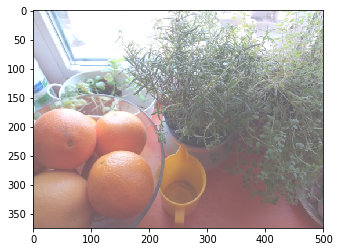

3


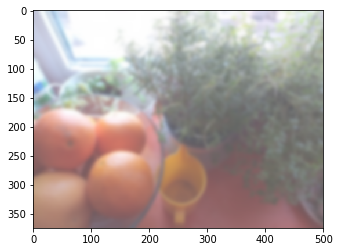

5


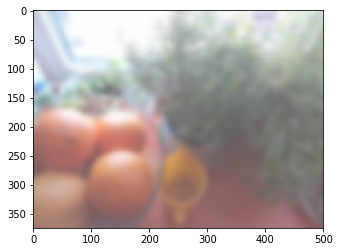

7


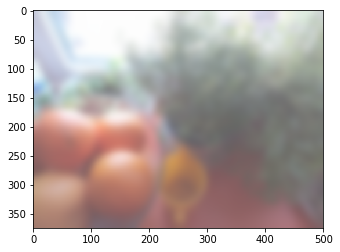

9


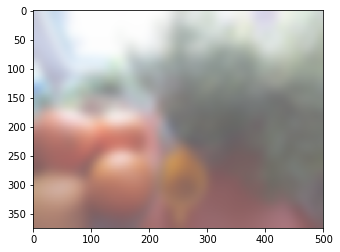

In [11]:
plt.imshow(obraz)
plt.show()
for k in range(3,11,2):
    print(k)
    filtered_image0 = gaussian_filter(obraz[:,:,0], k)
    filtered_image1 = gaussian_filter(obraz[:,:,1], k)
    filtered_image2 = gaussian_filter(obraz[:,:,2], k)
    plt.imshow(np.stack([filtered_image0, filtered_image1, filtered_image2], axis=2))
    plt.show()

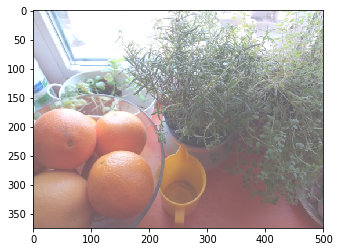

3


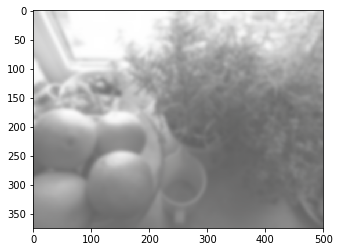

5


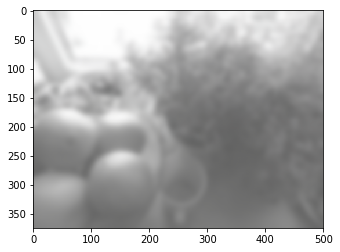

7


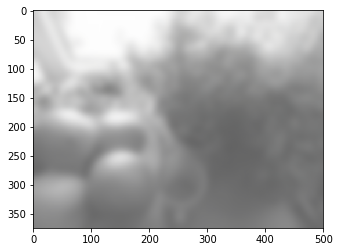

9


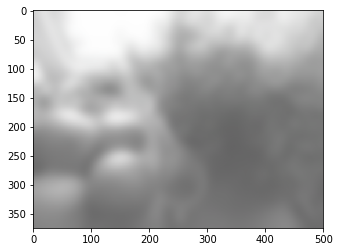

In [12]:
plt.imshow(obraz)
plt.show()
for k in range(3,11,2):
    print(k)
    filtered_image = gaussian_filter(obraz, k)
    plt.imshow(filtered_image)
    plt.show()

## 5. Napisz program wykrywający krawędzie przy pomocy filtru Sobel’a, porównaj wyniki swojej implementacji (na podstawie wykładu) z wynikam funkcji sobel 



In [24]:
import numpy as np
from scipy.ndimage import sobel

In [39]:
dims = mean_comp_obraz.shape
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel2 = kernel1.T[::-1]
image_sobel = np.zeros_like(mean_comp_obraz)
for i in range(1, dims[0]-3):
    for j in range(1, dims[1]-3):
        chunk = mean_comp_obraz[i-1:i+2, j-1:j+2]
        a = (chunk * kernel1).sum()
        b = (chunk * kernel2).sum()
        image_sobel[i][j] = np.sqrt(abs(a*b))

kernel1

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [40]:
kernel2  

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

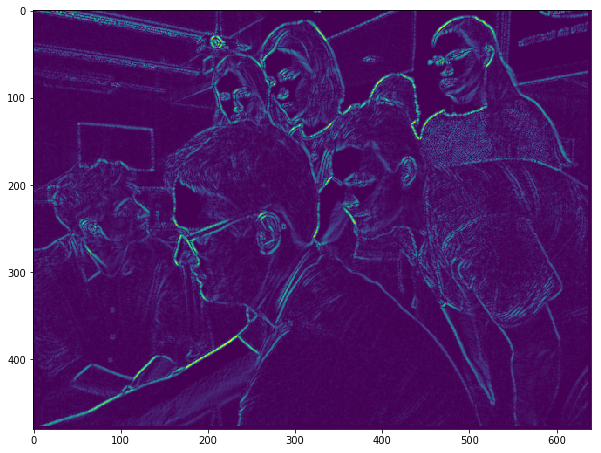

In [41]:
plt.figure(figsize=(10, 10))
plt.imshow(image_sobel)

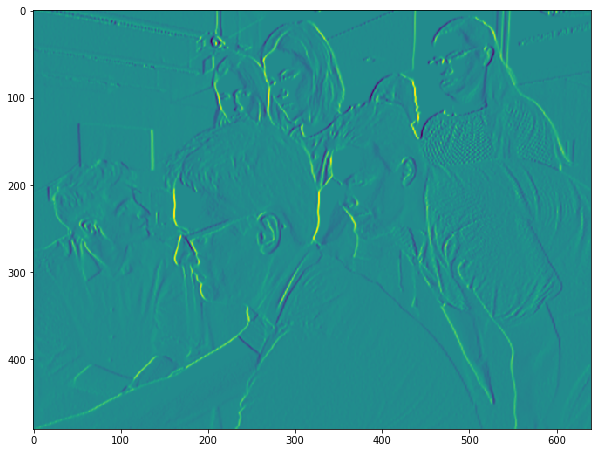

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(sobel(mean_comp_obraz))

## 6(*). Napisz program wykrywający cienie na obrazie z miernika odległości i wyświetlający tylko tę część obrazu z kamery, która jest w określonym zakresie odległości od kamery (Hint -- "Cienie" to obszary na obrazie z dalmierza, gdzie wiązka promieni została rozproszona i nie wróciła do kamery. Jaką wartość przypisuje jej biblioteka?).

stwórz maskę

## 7(*). Użyj biblioteki pydicom do wczytania przekrojów przez głowę z projektu visible human. Napisz program, który zamieni te przekroje poziome na prekroje pionowe. Użyj wygładzania filtrem Gaussowskim 3D (można też wykorzystać już pobrane pliki tutaj).